## Imports 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("King_County_House_prices_dataset.csv")

## Quick Overview

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21597, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [154]:
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


## Data Cleaning

In [155]:
#float to int
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)

**Missing values/data:**
- waterfront 
- yr_renovated --> but also a lot of null-values, so the house never got renovate  
- views    

In [8]:
np.sort(df.yr_renovated.unique())

array([   0., 1934., 1940., 1944., 1945., 1946., 1948., 1950., 1951.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962.,
       1963., 1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.,   nan])

In [4]:
df.query("yr_renovated > 0.0")["yr_renovated"].count()

744

In [5]:
#Durschnitllicher Wert von renovierten Häusern ist höher als der durchschnittliche mean -> 200k ca
ren_yes = df.query("yr_renovated > 0.0")
ren_yes.price.mean()

768901.8924731183

In [15]:
ren_yes.price.min()

110000.0

In [16]:
ren_yes.price.max()

7700000.0

In [24]:
ren_yes.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,744.00,744.00,744.00,744.00,744.00,744.00,652.00,743.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4.418716e+09,768901.89,3.46,2.31,2327.38,16215.53,1.50,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2.908265e+09,627125.79,1.07,0.90,1089.00,38235.31,0.49,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3.600057e+06,110000.00,1.00,0.75,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1.922985e+09,412250.00,3.00,1.75,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3.899100e+09,607502.00,3.00,2.25,2200.00,7375.00,1.50,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7.014200e+09,900000.00,4.00,2.75,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9.829200e+09,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


In [18]:
ren_yes.price.describe().round(2)

count        744.00
mean      768901.89
std       627125.79
min       110000.00
25%       412250.00
50%       607502.00
75%       900000.00
max      7700000.00
Name: price, dtype: float64

In [19]:
ren_yes.grade.describe()

count    744.000000
mean       7.752688
std        1.196954
min        4.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       13.000000
Name: grade, dtype: float64

In [20]:
ren_yes.sqft_living.describe()

count      744.000000
mean      2327.377688
std       1089.002040
min        520.000000
25%       1560.000000
50%       2200.000000
75%       2872.500000
max      12050.000000
Name: sqft_living, dtype: float64

In [10]:
744 / 21596 * 100

3.445082422670865

744 (3.5%) houses were renovate 

**First and last year where house was sold | time periode**

In [11]:
df.date.min()

'1/10/2015'

In [12]:
df.date.max()

'9/9/2014'

In [13]:
df.yr_built.min()

1900

In [14]:
df.yr_built.max()

2015

In [15]:
df.yr_built.mean()

1970.9996758809093

In [16]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


**Price**

In [17]:
df.price.min()

78000.0

In [18]:
df.price.max()

7700000.0

In [19]:
df.price.mean()

540296.5735055795

In [20]:
df.price.std()

367368.1401013936

In [21]:
df.price.median()

450000.0

In [22]:
#Find Outliers
df.query("price > 4000000")["price"].count()

11

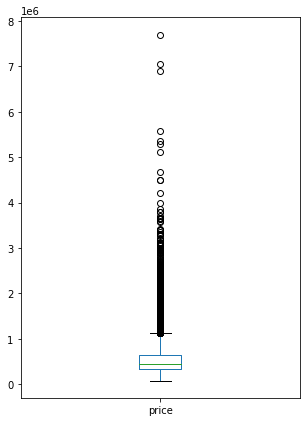

In [159]:
plt.figure(figsize=(5,7))
df.price.plot(kind="box");

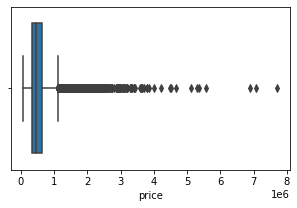

In [165]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['price'])
            #, y = df['price'])

plt.show()

In [72]:
#Price Ranges 

price_sorted = df["price"].sort_values()

df_quantile_price = pd.qcut(price_sorted, q=5)
#df_quantile_price .name = “column_new”


In [66]:
df_quantile_price.head(20)

15279    (77999.999, 322000.0]
465      (77999.999, 322000.0]
16184    (77999.999, 322000.0]
8267     (77999.999, 322000.0]
2139     (77999.999, 322000.0]
18453    (77999.999, 322000.0]
3763     (77999.999, 322000.0]
10242    (77999.999, 322000.0]
16700    (77999.999, 322000.0]
13743    (77999.999, 322000.0]
5860     (77999.999, 322000.0]
3106     (77999.999, 322000.0]
16516    (77999.999, 322000.0]
18924    (77999.999, 322000.0]
12539    (77999.999, 322000.0]
17566    (77999.999, 322000.0]
7985     (77999.999, 322000.0]
10758    (77999.999, 322000.0]
14567    (77999.999, 322000.0]
3318     (77999.999, 322000.0]
Name: price, dtype: category
Categories (4, interval[float64]): [(77999.999, 322000.0] < (322000.0, 450000.0] < (450000.0, 645000.0] < (645000.0, 7700000.0]]

In [73]:
df_quantile_price.value_counts()

(399897.0, 519000.0]     4324
(700436.0, 7700000.0]    4320
(77999.999, 298910.0]    4320
(298910.0, 399897.0]     4319
(519000.0, 700436.0]     4314
Name: price, dtype: int64

**Waterfront**

In [24]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [25]:
waterfront_yes = df[df.waterfront == 1.0]

In [26]:
round(waterfront_yes.price.mean())

1717215

In [27]:
w_y_m = round(waterfront_yes.price.median())

In [28]:
waterfront_no = df[df.waterfront != 1.0]

In [29]:
round(waterfront_no.price.mean())

532286

In [30]:
w_n_m = round(waterfront_no.price.median())

In [10]:
#df.groupby("waterfront")["price"].median().plot(kind="hist");


**Date & Price trend**

In [32]:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [33]:
#Convert date to pandas date format 
df['date'] = pd.to_datetime(df['date'])

#Only Month & Year 
df["date"] = pd.to_datetime(df["date"]).apply(lambda x: x.strftime('%Y-%m'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

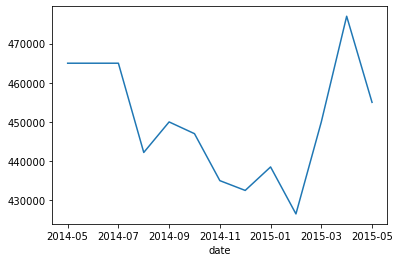

In [34]:
#Median Price per month 
median_price = df.groupby("date")["price"].median()

median_price.plot(kind="line");

plt.savefig("data_viz/median_price_line.png")

In [35]:
median_price.min()

426500.0

In [36]:
median_price.max()

477000.0

In [37]:
median_price.max() - median_price.min()

50500.0

**Price Distribution**

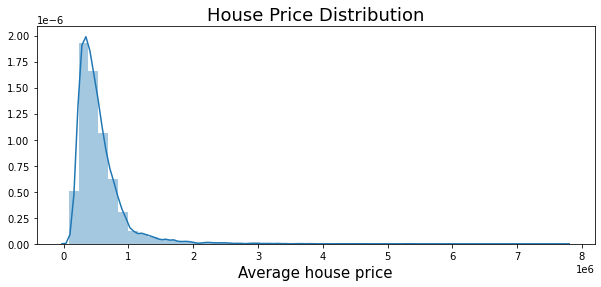

In [38]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df["price"])

plt.xlabel('Average house price', size=15)
plt.show()

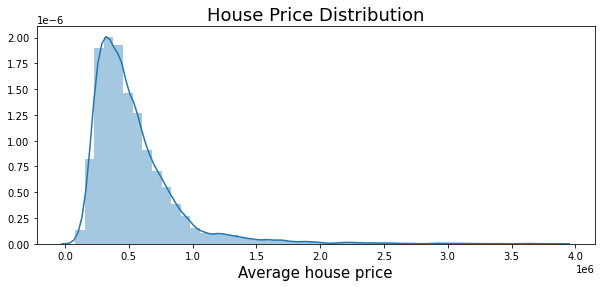

In [186]:
#Without prices over 4mio
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df1["price"])

plt.xlabel('Average house price', size=15)
plt.show()

**Price & Number of floors**

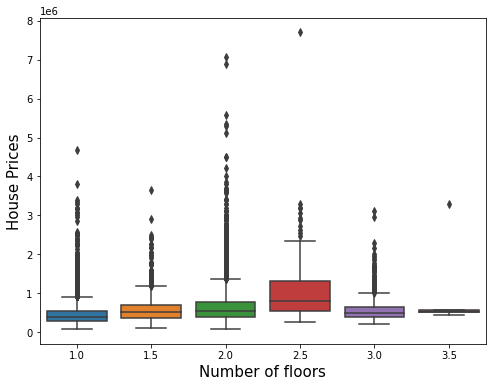

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['floors'], y = df['price'])
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

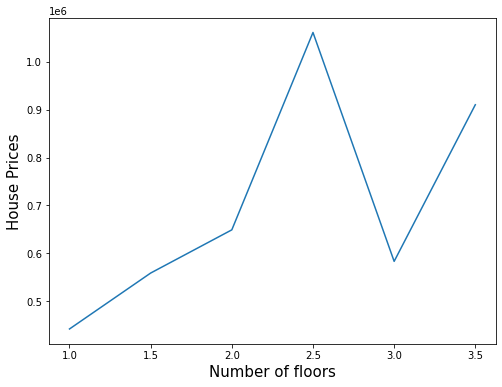

In [145]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['floors'], y = df['price'], ci=None)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

**Price & Number of bedrooms**

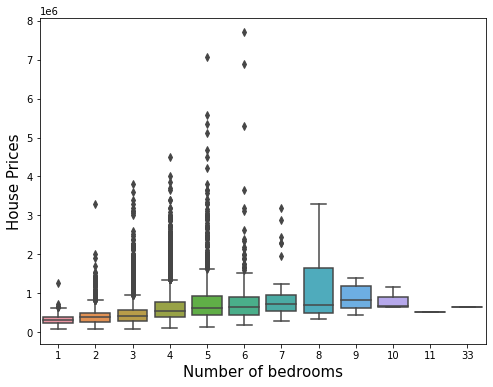

In [144]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['bedrooms'], y = df['price'])
plt.xlabel('Number of bedrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

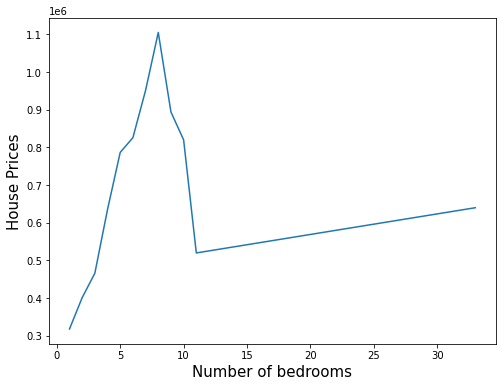

In [147]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['bedrooms'], y = df['price'], ci=None)
plt.xlabel('Number of bedrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

**Price & sqft_living**

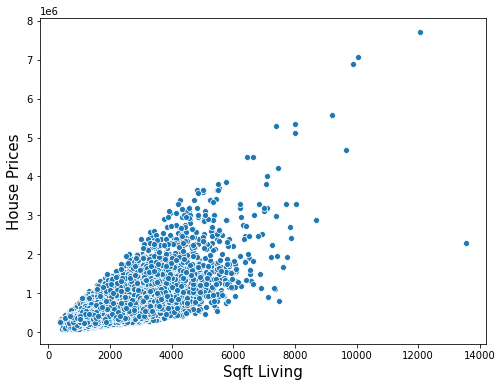

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['sqft_living'], y = df['price'])
plt.xlabel('Sqft Living', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

#plt.axhline(df.price.mean(), ls='--', color="r")

plt.show()

**Price & Grade**

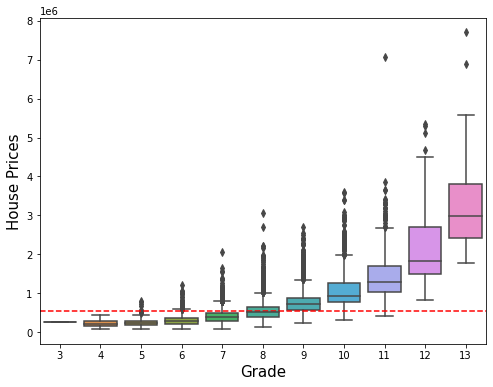

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['grade'], y = df['price'])
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.axhline(df.price.mean(), ls='--', color="r")

plt.show()

In [ ]:
#Ab welcher Grade kriegt man über dem durchschnittlichen Preis


In [ ]:
#Egal ob Grade 3-6, da avg. Prices fast gleich bleibt, ab 7 erst gute Steigerung 

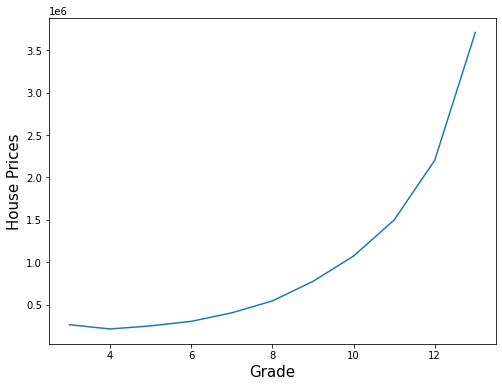

In [8]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['grade'], y = df['price'], ci=None)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

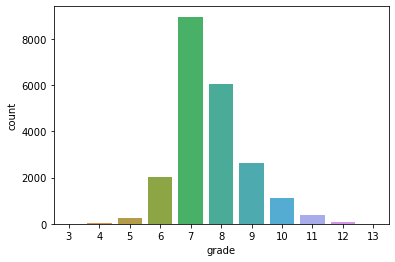

In [143]:
sns.countplot(x="grade", data=df);

**Price & Condition**

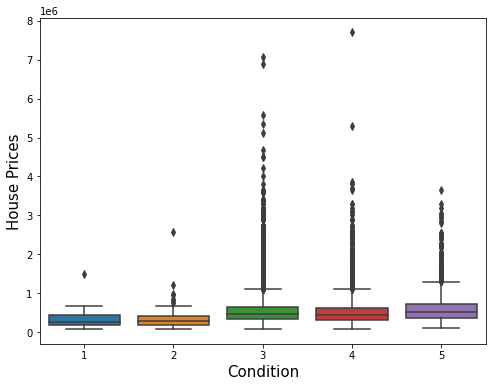

In [140]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['condition'], y = df['price'])
plt.xlabel('Condition', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

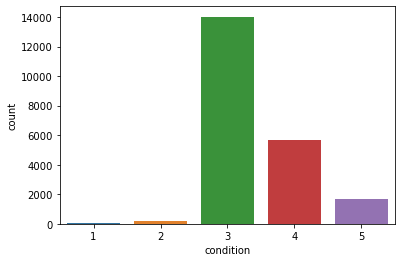

In [142]:
sns.countplot(x="condition", data=df);

**Zipcode & Price** 

https://www.kaggle.com/artemkorottchenko/eda-visualization-price-prediction-10-models

**Price & Year Built**

In [150]:
df.yr_built.isnull().count()
 

21597

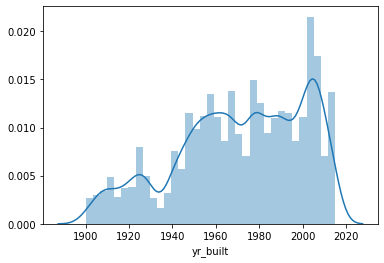

In [153]:
sns.distplot(df.yr_built); 

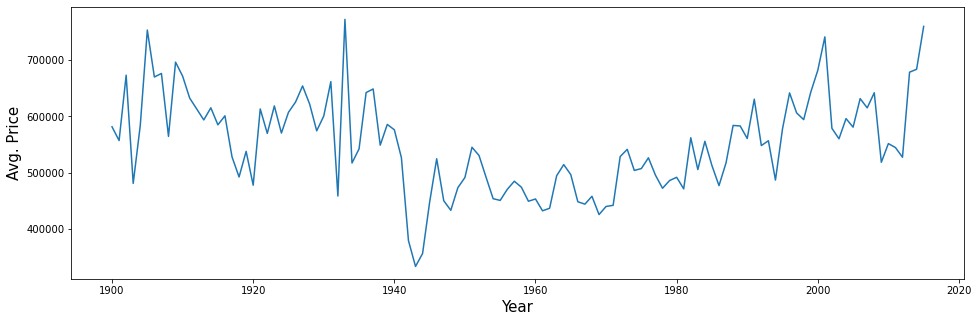

In [45]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df, ci=None)

plt.ylabel('Avg. Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

In [14]:
#Warum Häuser nach 1940 mehr Wert? Bessere Lage, weil die ersten direkt am Wasser gebaut worden sind?

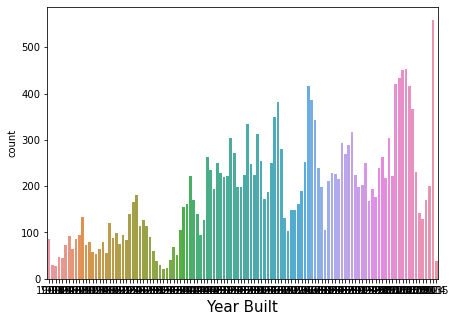

In [156]:
plt.figure(figsize=(7,5))

sns.countplot(x="yr_built", data=df)#, ci=None)
plt.xlabel('Year Built', size=15)

plt.show()

In [18]:
#Mehr Häuser werden gebaut --> Nachfrage könnte das Angebot übersteigen oder andersrum 
#--> Preise fallen/sinken?

In [46]:
df[df.yr_renovated > 0.0]["yr_renovated"].min()

1934.0

In [47]:
df[df.yr_renovated > 0.0]["yr_renovated"].max()

2015.0

In [48]:
df[df.yr_renovated > 0.0]["yr_renovated"].mean()

1995.9287634408602

In [49]:
df[df.yr_renovated > 0.0]["yr_renovated"].count()

744

In [50]:
#Wurden viele Häuse noch einmal renoviert?
#Krieg und geschwächte Wirtschaft? 
df[(df.yr_renovated > 0) & (df.yr_renovated < 1940)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13723,4475800065,2014-06,459950.0,3,1.75,1850,6869,1.0,0.0,2.0,...,6,1100,750.0,1919,1934.0,98166,47.4648,-122.363,1850,10096


**Scatter Matrix**

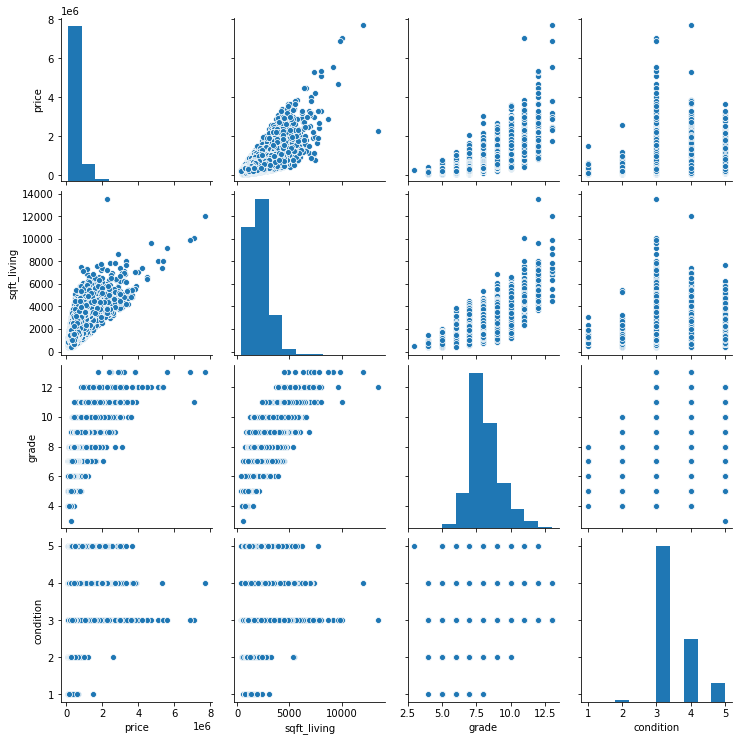

In [51]:
#from pandas.plotting import scatter_matrix 
#scatter_matrix(df[["price", "sqft_living", "grade", "condition"]]);

sns.pairplot(df[["price", "sqft_living", "grade", "condition"]])

plt.savefig("data_viz/scatter_matrix.png")

#bedrooms, bathrooms, sqft_lot yr_built are missing 

In [ ]:
#Scatter Matrix without Outliers 

**MAP**

In [107]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [111]:
BBox = (df.long.min(), df.long.max(), df.lat.min(), df.lat.max())

(47.1559, 47.7776)

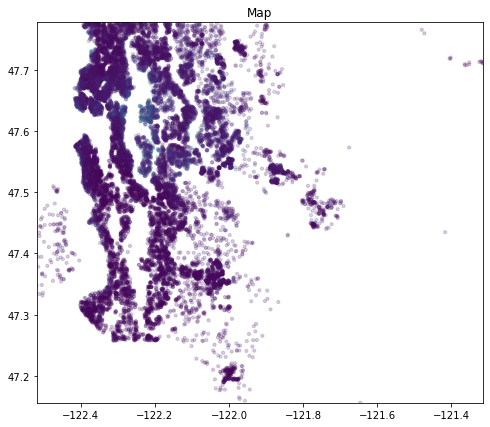

In [126]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c=df.price, s=10)
ax.set_title('Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

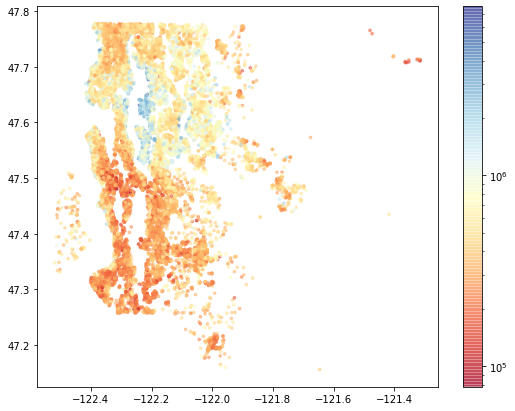

In [3]:
cm = plt.cm.get_cmap('RdYlBu')
x = df.long.values
y = df.lat.values
z = df.price.values

plt.figure(figsize=(9,7))
map_kc = plt.scatter(x, y, c=z, cmap=cm, zorder=1, alpha= 0.5, s=7, norm=matplotlib.colors.LogNorm());
plt.colorbar(map_kc);


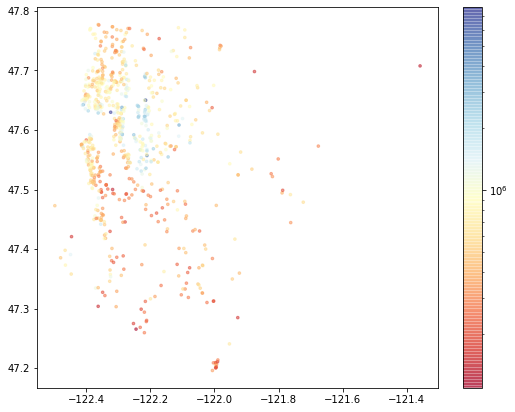

In [7]:
#Show just the renovated houses 
cm = plt.cm.get_cmap('RdYlBu')
x = ren_yes.long.values
y = ren_yes.lat.values
z = ren_yes.price.values

plt.figure(figsize=(9,7))
map_kc = plt.scatter(x, y, c=z, cmap=cm, zorder=1, alpha= 0.5, s=7, norm=matplotlib.colors.LogNorm());
plt.colorbar(map_kc);

In [77]:
def generateBaseMap(map_location=[47.5,-122.161], zoom=9):
    base_map = folium.Map(location=map_location, control_scale=True, zoom_start=zoom)
    return base_map

In [80]:
#!pip install folium

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)


In [87]:
import folium
from folium.plugins import HeatMap

df_copy = df[np.logical_and(df.yr_built<=2010,df.yr_built >= 1970)] 
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['lat', 'long', "count"]].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=15).add_to(base_map)
base_map

<ipython-input-87-58f51e1a83ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['count'] = 1


## Correlations | Heatmap

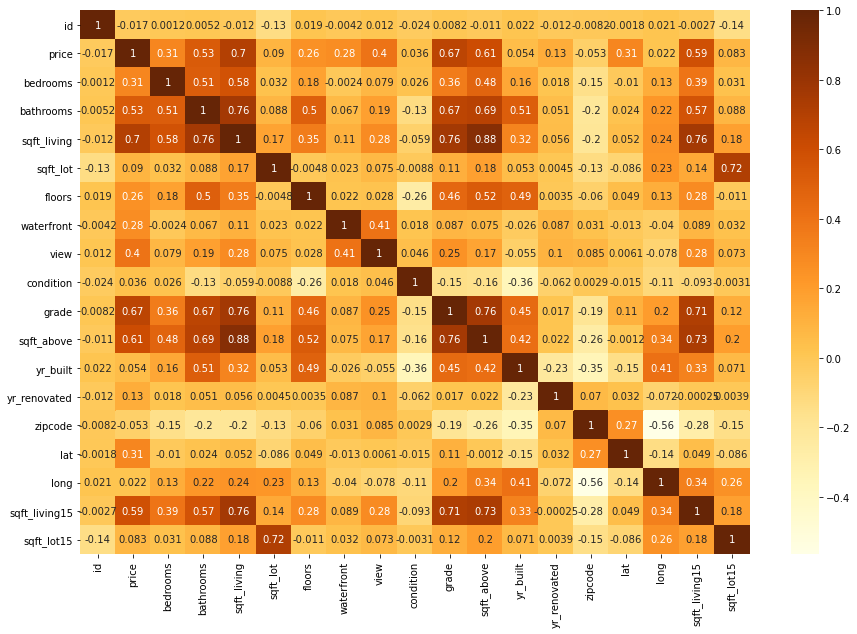

In [52]:
corr = df.corr()

plt.figure(figsize=(15,10))
heatmap = sns.heatmap(corr, cmap='YlOrBr', annot=True)

plt.savefig("data_viz/heatmap.png")

1. Continuous: sqft_living, sqft_lot, age, renovation

2. Categorical: Bedrooms, Bathrooms, Waterfront, view, condition, grade, floors

3. Nominal: Zip code, lat, long

In [85]:
corr_list = df.corr()['price'].sort_values(ascending=False).round(3)
corr_list

price            1.000
sqft_living      0.702
grade            0.668
sqft_above       0.605
sqft_living15    0.585
bathrooms        0.526
view             0.396
bedrooms         0.309
lat              0.307
waterfront       0.276
floors           0.257
yr_renovated     0.130
sqft_lot         0.090
sqft_lot15       0.083
yr_built         0.054
condition        0.036
long             0.022
id              -0.017
zipcode         -0.053
Name: price, dtype: float64

In [86]:
#Without outliers (df1)

corr_list1 = df1.corr()['price'].sort_values(ascending=False).round(3)
corr_list1

price            1.000
sqft_living      0.680
grade            0.669
sqft_living15    0.594
sqft_above       0.582
bathrooms        0.508
view             0.392
lat              0.328
bedrooms         0.312
floors           0.261
waterfront       0.256
yr_renovated     0.128
sqft_lot         0.080
sqft_lot15       0.074
yr_built         0.051
condition        0.042
long             0.020
id              -0.018
zipcode         -0.048
Name: price, dtype: float64

#### Replace Missing Values 

In [54]:
#df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

## Linear Regression 

In [55]:
import statsmodels.api as sm
from scipy import stats

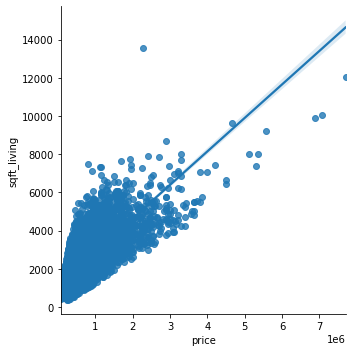

In [56]:
#lmplot by seaborn 
sns.lmplot('price', 'sqft_living',data=df);

**Without outliers**

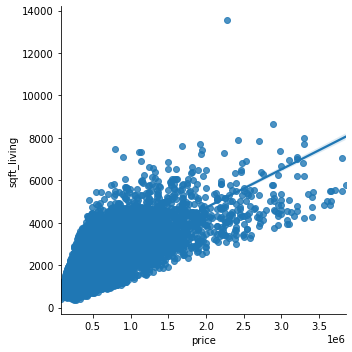

In [57]:
price_wo_outliers = df.query("price < 4000000")

sns.lmplot("price", 'sqft_living',data=price_wo_outliers);

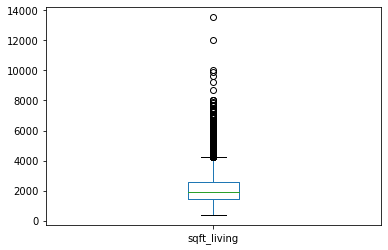

In [58]:
# Also remove sqft_living outliers
df.sqft_living.plot(kind="box");

In [59]:
df.query("sqft_living > 6000")["price"].count()

68

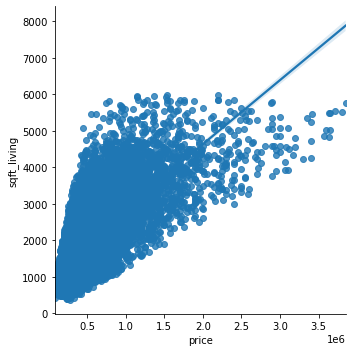

In [60]:
price_wo_outliers = df.query("price < 4000000 and sqft_living < 6000")

sns.lmplot("price", 'sqft_living',data=price_wo_outliers);

In [190]:
#df[(df.yr_renovated > 0) & (df.yr_renovated < 1940)]

df1 = df[df.price < 4000000]
df1 = df1[df1.sqft_living < 6000]
df1.price.sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
18467    3650000.0
6502     3650000.0
16288    3710000.0
19002    3800000.0
2083     3850000.0
Name: price, Length: 21529, dtype: float64

**Data Cleaning & More Outliers** 

In [118]:
#bedrooms 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [191]:
df1 = df1[df1.bedrooms < 10]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [192]:
df1.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3046
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     728
3.25     587
3.75     151
4.00     129
4.50      92
4.25      73
0.75      71
4.75      19
5.00      17
1.25       9
5.25       8
0.50       4
6.00       2
5.50       2
7.50       1
5.75       1
Name: bathrooms, dtype: int64

In [193]:
#Deleting values with less than 6 
df1 = df1[df1.bathrooms != 5.75]
df1 = df1[df1.bathrooms != 0.50]
df1 = df1[df1.bathrooms != 8.00]
df1 = df1[df1.bathrooms != 6.25]
df1 = df1[df1.bathrooms != 6.75]
df1 = df1[df1.bathrooms != 6.50]
df1 = df1[df1.bathrooms != 7.50]
df1 = df1[df1.bathrooms != 7.75]

In [181]:
df1.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3046
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     728
3.25     587
3.75     151
4.00     129
4.50      92
4.25      73
0.75      71
4.75      19
5.00      17
1.25       9
5.25       8
6.00       2
5.50       2
Name: bathrooms, dtype: int64

In [182]:
df1.shape

(21518, 21)

In [124]:
df1.describe().round(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.151800e+04,21518.0,21518.0,21518.0,21518.0,21518.0,21518.0,19145.0,21456.0,21518.0,21518.0,21518.0,21518.0,17694.0,21518.0,21518.0,21518.0,21518.0,21518.0
mean,4.582327e+09,533567.5,3.4,2.1,2064.0,14898.6,1.5,0.0,0.2,3.4,7.6,1776.3,1971.0,83.1,98078.0,47.6,-122.2,1981.3,12620.7
std,2.876780e+09,337097.6,0.9,0.7,870.2,40725.1,0.5,0.1,0.8,0.7,1.2,796.6,29.4,398.8,53.5,0.1,0.1,677.0,26400.1
min,1.000102e+06,78000.0,1.0,0.8,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.123700e+09,321000.0,3.0,1.8,1420.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.904955e+09,450000.0,3.0,2.2,1910.0,7600.0,1.5,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.312175e+09,640000.0,4.0,2.5,2540.0,10619.2,2.0,0.0,0.0,4.0,8.0,2200.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10057.2
max,9.900000e+09,3850000.0,9.0,6.0,5990.0,1651359.0,3.5,1.0,4.0,5.0,13.0,5990.0,2015.0,2015.0,98199.0,47.8,-121.3,5790.0,871200.0


In [131]:
df1[df1.price < 100000].price.count()

24

#### Modeling | OLS

In [69]:
X = df[["sqft_living", "grade", "condition", "bathrooms", "bedrooms"]]

X = sm.add_constant(X)
y = df.price

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5415.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:42:48   Log-Likelihood:            -2.9861e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21591   BIC:                         5.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.466e+05   1.82e+04    -41.022      0.000   -7.82e+05   -7.11e+05
sqft_living   219.5021      3.554     61.762      0.000     212.536     226.468
grade        1.036e+05   2307.017     44.905      0.000    9.91e+04    1.08e+05
condition    6.517e+04   2614.801     24.923      0.000       6e+04    7.03e+04
bathrooms   -1.805e+04   3462.347     -5.213      0.000   -2.48e+04   -1.13e+04
bedrooms    -4.362e+04   2277.185    -19.155      0.000   -4.81e+04   -3.92e+04
==============================================================================
Omnibus:                    16743.573   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975537.329
Skew:                           3.242   Prob(JB):                         0.00
Kurtosis:                      35.281   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
X1 = df["sqft_living"]

X1 = sm.add_constant(X)
y1 = df.price

model1 = sm.OLS(y1, X1)
results1 = model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5415.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:42:48   Log-Likelihood:            -2.9861e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21591   BIC:                         5.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.466e+05   1.82e+04    -41.022      0.000   -7.82e+05   -7.11e+05
sqft_living   219.5021      3.554     61.762      0.000     212.536     226.468
grade        1.036e+05   2307.017     44.905      0.000    9.91e+04    1.08e+05
condition    6.517e+04   2614.801     24.923      0.000       6e+04    7.03e+04
bathrooms   -1.805e+04   3462.347     -5.213      0.000   -2.48e+04   -1.13e+04
bedrooms    -4.362e+04   2277.185    -19.155      0.000   -4.81e+04   -3.92e+04
==============================================================================
Omnibus:                    16743.573   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975537.329
Skew:                           3.242   Prob(JB):                         0.00
Kurtosis:                      35.281   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modeling without the outliers

In [240]:
df1.shape

(21518, 21)

In [3]:
df1 = df

**2. Versuch**

In [348]:
df1.sqft_living.count()

16056

In [319]:
round(21597*0.025)
#remove top & low 2.5%

540

In [320]:
df1.sqft_living.sort_values()[0:540]

5605      950
420       950
18472     950
13088     950
7206      950
         ... 
3891     1040
4047     1040
18088    1040
7960     1040
4289     1040
Name: sqft_living, Length: 540, dtype: int64

In [321]:
df1.sqft_living.sort_values()[-540:]

18057    3400
7130     3400
4240     3400
20810    3400
10823    3400
         ... 
7705     3750
19578    3750
11077    3750
756      3750
21086    3753
Name: sqft_living, Length: 540, dtype: int64

In [322]:
df1.price.sort_values()[0:540]

46       210490.0
6951     210500.0
2888     210500.0
9880     210500.0
10872    210750.0
           ...   
2356     232000.0
4165     232000.0
492      232000.0
11134    232500.0
788      232500.0
Name: price, Length: 540, dtype: float64

In [323]:
df1.price.sort_values()[-540:]

26        937000.0
4787      937500.0
4087      937500.0
15115     937750.0
10477     938000.0
           ...    
18660    1150000.0
7772     1150000.0
16683    1150000.0
12720    1150000.0
5094     1150000.0
Name: price, Length: 540, dtype: float64

In [4]:
#top & low 2.5%

df1 = df[df.price < 937000] 
df1 = df1[df.price > 232500]
df1 = df1[df1.sqft_living < 3400] 
df1 = df1[df1.sqft_living > 1040]

<ipython-input-4-401edd0c1e66>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.price > 232500]


In [ ]:
#top & low 5%

df1 = df[df.price < 1160000] 
df1 = df1[df.price > 210000]
df1 = df1[df1.sqft_living < 3760] 
df1 = df1[df1.sqft_living > 940]

In [5]:
df1.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.605600e+04,16056.00,16056.00,16056.00,16056.00,16056.00,16056.00,14280.00,16007.00,16056.00,16056.00,16056.00,16056.00,13242.00,16056.00,16056.00,16056.00,16056.00,16056.00
mean,4.640050e+09,480997.61,3.40,2.12,1997.19,13955.33,1.51,0.00,0.16,3.41,7.58,1715.79,1972.90,72.80,98077.27,47.57,-122.21,1935.60,12144.77
std,2.890218e+09,168622.99,0.84,0.61,573.08,36884.18,0.54,0.05,0.61,0.64,0.86,598.55,28.77,374.19,52.04,0.14,0.14,527.27,25414.22
min,1.000102e+06,232603.00,1.00,0.50,1050.00,520.00,1.00,0.00,0.00,1.00,5.00,560.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.171400e+09,342000.00,3.00,1.75,1530.00,5000.00,1.00,0.00,0.00,3.00,7.00,1260.00,1955.00,0.00,98033.00,47.47,-122.33,1539.25,5000.00
50%,3.958150e+09,450000.00,3.00,2.25,1930.00,7449.00,1.50,0.00,0.00,3.00,7.00,1570.00,1977.00,0.00,98065.00,47.58,-122.22,1850.00,7500.00
75%,7.399301e+09,594000.00,4.00,2.50,2400.00,10200.00,2.00,0.00,0.00,4.00,8.00,2090.00,1998.00,0.00,98117.00,47.68,-122.12,2270.00,9775.00
max,9.900000e+09,936000.00,33.00,5.25,3390.00,1651359.00,3.50,1.00,4.00,5.00,11.00,3390.00,2015.00,2015.00,98199.00,47.78,-121.32,4610.00,560617.00


In [241]:
df1["sqft_living"].count()

21597

**1. Versuch** --> hat nicht geklappt

In [197]:
#sqft_living & price without outliers + small adjustments from bath- & bedrooms 
x = df1["sqft_living"]
df1["sqft_living"] = x[x.between(x.quantile(.10), x.quantile(.90))] # without outliers

In [227]:
df1["sqft_living"].count()

17247

In [226]:
df1["sqft_living"].head()

0    1180.0
1    2570.0
3    1960.0
4    1680.0
6    1715.0
Name: sqft_living, dtype: float64

In [223]:
df1["sqft_living"].dropna(inplace=True)

In [207]:
df1["price"].count()

17292

In [204]:
xp = df1["price"]
df1["price"] = xp[xp.between(xp.quantile(.10), xp.quantile(.90))] # without outliers

In [206]:
df1["price"].dropna(inplace=True)

#### Modeling | sklearn

In [27]:
from sklearn.model_selection import train_test_split

X = df[["sqft_living"]]
y = df[["price"]]
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,     # 70% der Daten für das Training
                                                    random_state = None)

In [28]:
from sklearn.linear_model import LinearRegression   # importieren der Klasse
 
lr = LinearRegression()                             # instanziieren der Klasse
 
lr.fit(X_train, y_train)                            # trainieren

LinearRegression()

In [29]:
print('------ Lineare Regression -----')
print('Funktion via sklearn: y = %.3f * x + %.3f' % (lr.coef_[0], lr.intercept_))
print("Alpha (Intercept): {}".format(lr.intercept_))
print("Beta (Slope/Coef): {}".format(lr.coef_[0]))
print("Training Set R² Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set R² Score: {:.2f}".format(lr.score(X_test, y_test)))
print("\n")

------ Lineare Regression -----
Funktion via sklearn: y = 279.056 * x + -41646.830
Alpha (Intercept): [-41646.82981797]
Beta (Slope/Coef): [279.05599357]
Training Set R² Score: 0.49
Test Set R² Score: 0.49




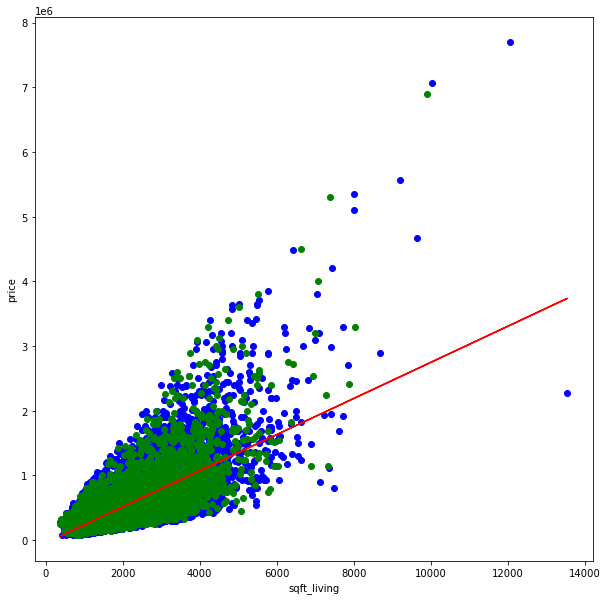

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = 'blue')                 # Blaue Punkte sind Trainingsdaten
plt.scatter(X_test, y_test, color = 'green')                  # Grüne Punkte sind Testdaten
plt.plot(X_train, lr.predict(X_train), color = 'red')         # Hier ensteht die Gerade (x, y) = (x, lr.predict(x)
plt.xlabel(X_train.columns[0])
plt.ylabel("price")
plt.show()
 

In [31]:
y_pred = lr.predict(X_test)

In [32]:
#compare = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
#compare

 **MAPE**

In [33]:
y_test, y_pred = np.array(y_test), np.array(y_pred)
print("MAPE:",round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100),"%")

MAPE: 36.0 %


In [34]:
#Compare all r^2 
import statsmodels.formula.api as smf
for i in df: 
    rs = smf.ols(formula=f'price ~ {i}', data = df).fit().rsquared.round(3)
    print(i,'|', rs)

id | 0.0
date | 0.02
price | 1.0
bedrooms | 0.095
bathrooms | 0.277
sqft_living | 0.493
sqft_lot | 0.008
floors | 0.066
waterfront | 0.076
view | 0.157
condition | 0.001
grade | 0.446
sqft_above | 0.366
sqft_basement | 0.202
yr_built | 0.003
yr_renovated | 0.017
zipcode | 0.003
lat | 0.094
long | 0.0
sqft_living15 | 0.343
sqft_lot15 | 0.007


**Multi Linear Regression Model**

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import cross_val_score

In [27]:
#Normal Dataset
X9 = joined_df_dum
y9 = df[["price"]]

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.25, random_state=42)

In [17]:
#Without Outliers 
X9 = joined_df_dum1
y9 = df1[["price"]]

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.25, random_state=42)

In [28]:
model_MLR = LinearRegression()
model_MLR.fit(X9_train, y9_train)

LinearRegression()

In [29]:
LinearRegression()

LinearRegression()

In [30]:
y9hat_pred_MLR = model_MLR.predict(X9_test)

In [31]:
cross_val_MLR = round(np.mean(cross_val_score(model_MLR,X9_train,y9_train)),4)
R2_MLR = round(r2_score(y9_test, y9hat_pred_MLR),4)
MAE_MLR = int(mean_absolute_error(y9_test,y9hat_pred_MLR))

y9_test, y9hat_pred_MLR = np.array(y9_test), np.array(y9hat_pred_MLR)
MAPE_MLR = np.mean(np.abs((y9_test - y9hat_pred_MLR) / y9_test)) * 100

print("R-squared:",R2_MLR)
print("MAE:",MAE_MLR)
print("MAPE:",round(MAPE_MLR))

R-squared: 0.7732
MAE: 97090
MAPE: 18.0


In [359]:
#MAPE 14% with 5% Outliers 
#MAPE 14% & r2 = 0.75 with 2.5% Outliers 
#MAPE with normal dataset: 18% & r2 = 0.77

**MAPE für das Trainingsset**

In [32]:
y9hat_pred_MLR = model_MLR.predict(X9_train)

In [33]:
cross_val_MLR = round(np.mean(cross_val_score(model_MLR,X9_train,y9_train)),4)
R2_MLR = round(r2_score(y9_train, y9hat_pred_MLR),4)
MAE_MLR = int(mean_absolute_error(y9_train,y9hat_pred_MLR))

y9_train, y9hat_pred_MLR = np.array(y9_train), np.array(y9hat_pred_MLR)
MAPE_MLR = np.mean(np.abs((y9_train - y9hat_pred_MLR) / y9_train)) * 100

print("R-squared:",R2_MLR)
print("MAE:",MAE_MLR)
print("MAPE:",round(MAPE_MLR))

R-squared: 0.7903
MAE: 96991
MAPE: 18.0


In [ ]:
#Problem: im Test-Set müssen die Outlier mit drin sein 

**Dummy Variables**

In [7]:
#Normal Dataset
X_dum_g = pd.get_dummies(df["grade"]) #waterfront, view
X_dum_c = pd.get_dummies(df["condition"])
X_dum_z = pd.get_dummies(df["zipcode"])

#Without Outliers
X_dum_g1 = pd.get_dummies(df1["grade"]) #waterfront, view
X_dum_c1 = pd.get_dummies(df1["condition"])
X_dum_z1 = pd.get_dummies(df1["zipcode"])

In [8]:
joined_df_dum = pd.concat([df["sqft_living"], X_dum_g, X_dum_c, X_dum_z], axis=1)
joined_df_dum.head()

joined_df_dum1 = pd.concat([df1["sqft_living"], X_dum_g1, X_dum_c1, X_dum_z1], axis=1)
joined_df_dum1.head()

,sqft_living,5,6,7,8,9,10,11,1,2,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,2570,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1715,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1060,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Drop out one variable(?)

**Nicht-lineare Regression mit Scikit-Learn** 

https://data-science-blog.com/blog/2017/10/17/lineare-regression-in-python-scitkit-learn/

**Polynomial Regression**

In [34]:
 # siehe Kaggle 

**Normalisieren/Standardisieren**

https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa 